---

title: heckman两阶段完整讲解和实例有演示
date: 2023-10-31 12:44:03
tags: [heckman]

---


Heckman两阶段回归的中文名字是赫克曼两阶段回归。

这是经济学中解决选择偏误问题的统计方法，常用于解决样本选择偏误导致的有偏估计问题。其基本原理包括两个阶段：样本选择模型（回归样本为一个子样本）和处理效应模型（回归模型中包含一个内生的指示变量D）。



<!--more-->

## 背景

这是我们见到的最简单的一个回归模型：

$$
\mathbf{y^*=xb + \epsilon}
$$

如果有某种原因，样本不是随机产生的，比如说，你调查的是人们对碳税的支付意愿，不愿意支付的人可能在“愿意支付的金额”这个问题中拒绝回答，
这导致了你的样本缺失，你得到的样本往往是那些愿意支付， 这可能会导致你的回归模型中对参数的估计出现偏差。

如果你使用最小二乘法（OLS）估计模型参数， 那么这也违反了OLS的一个基本假设就是内生性问题。

内生性问题是OLS回归中常见的问题之一，其产生的原因主要有以下几种：

- 遗漏变量：在OLS回归模型中，如果研究者遗漏了某些重要的解释变量，而这些变量又与模型中的误差项相关，就会产生内生性问题。遗漏变量不仅会使模型的估计产生偏误，而且可能导致回归系数的标准误差被低估，从而产生“假回归”。
- **样本选择偏差：在研究过程中，样本选择的非随机性可能导致样本的估计参数不能准确反映总体的性质，进而产生内生性问题。**
- 互为因果：在某些情况下，解释变量和误差项之间可能存在相互影响的关系，导致解释变量和误差项之间形成互为因果的关系，从而产生内生性问题。
- 测量误差：测量误差可能导致解释变量与真实值偏离，这种偏差会影响到扰动项的大小，从而产生内生性问题。
- 序列相关：如果一个随机变量与它的过去值之间存在相关性，那么这个变量就存在序列相关问题。在OLS回归中，如果解释变量与误差项之间存在序列相关关系，就会导致内生性问题。
- 异方差性：异方差性是指OLS回归模型中的误差项具有不同的方差。当误差项的方差不相等时，OLS回归的估计结果将不再有效，可能导致内生性问题。
- 工具变量问题：在某些情况下，解释变量可能与其他影响被解释变量的因素相关，而我们又无法直接观测这些因素。此时，如果我们直接使用解释变量进行回归，就可能导致内生性问题。



为了解决这个问题，Heckman 发明了 样本选择的两阶段回归（赫克曼两阶段回归），这个算法让他获得了诺贝尔经济学奖，但是这个模型并不复杂， 你在这篇文章中就可以学fei。

## 样本选择机制

假设，样本的缺失是可以被预测的， 简单说就是有如下模型：

$$
\mathbf{z}^* = \mathbf{w}\gamma + \mathbf{u}
$$

$w$是一个变量，$\gamma$ 是系数，预测值$\mathbf{z}^*$ 用于样本的选择：

$$
\begin{split}\begin{align}
z_i =& 1 \text{ if } z^*_i > 0 \\
    =&0 \text{ if } z^*_i \le 0
\end{align}\end{split}
$$

意思是，这个预测值$\mathbf{z}^*$如果大于0，就代表这个样本被选出来了， 进入了你的回归样本中。把这个换个形式， 就是当$u_i \ge - \mathbf{w}_i\gamma$的时候， $z_i=1$样本就被选出来了。

**注意样本被选出来不是我们主动操作的，是对已经产生的样本的一个建模，因为样本收集完，就已经完成了样本选择过程，现在只是对这个过程的一个建模，很多童鞋会认为我们还在通过以上模型选择样本**

这里我假设你们学习过正态分布，那么你就懂得$\Phi(a)$的意思是x服从正态分布，那么x值小于a的概率就是$\Phi(a)$。
因为我们假定$\mathbf{u}$符合正态分布，即$\mathbf{u}\sim N(\mathbf{0},\mathbf{I})$，那么我们可以得出，样本被选择出来的概率是：

$$
\begin{split}\begin{align}
Pr(u_i \ge - \mathbf{w}_i\gamma) =& 1- \Phi(-\mathbf{w}_i\gamma)\\
&=\Phi(\mathbf{w}_i\gamma)
\end{align}\end{split}
$$

这里需要解释一下， 正态分布是对称的（对称轴是x=0），如图：

<img src="imgs/norm.png">

$\Phi(a)$ 就是x小于a的概率， 那么这个值与x大于-a的概率是一样的，所以$\Phi(a)=1-\Phi(-a)$

## 样本选择偏差

现在考虑到了样本选择是有偏差的， 那么我们可以构建我们真正关心的模型：

$$
y_i = y^*_i = \mathbf{x}_i \beta + \epsilon_i \text{ observed, if $z_i$ = 1}
$$

$$
\begin{split}\begin{align}
z_i =& 1 \text{ if } z^*_i > 0 \\
    =&0 \text{ if } z^*_i \le 0
\end{align}\end{split}
$$

因为残差就是变量， 我们现在其实有两个残差， 一个是来自样本选择模型($u_i$)， 一个是量化模型（我们真正关心的回归模型）($\epsilon_i$)，
我们必须对这两个变量做一些规定，否则模型无法估计，两个变量假定服从联合正态分布：

$$
\begin{split}\begin{equation}
\begin{bmatrix} u_i \\ \epsilon_i \end{bmatrix} \sim Normal\left( \begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & \rho \\ \rho & \sigma^2_\epsilon \end{bmatrix}  \right) 
\end{equation}\end{split}
$$

注意上面的$\rho$，它是相关系数， 但也可以说是协方差，因为标准数据的协方差就是相关系数。

不考虑样本偏差的情况下，我们根据最小二乘法知道， y的期望： $E(y_i)=\mathbf{x}_i\beta$ ， 但是现在加入了一个样本选择模型，
那么我们可以计算得到新的y的期望的计算公式：

$$
\begin{split}\begin{align}
E(y_i | y_i \text{ observed}) = & E(y_i | z^* > 0 ) \\
=&E(y_i | u_i > -\mathbf{w}_i \gamma) \\
=&\mathbf{x}_i \beta + E(\epsilon_i | u_i > -\mathbf{w}_i \gamma) \\
=&\mathbf{x}_i \beta + \rho \sigma_\epsilon \frac{\phi(\mathbf{w}_i \gamma)}{\Phi(\mathbf{w}_i \gamma)}
\end{align}\end{split}
$$

这跟之前的期望的差别就是这部分$\rho \sigma_\epsilon \frac{\phi(\mathbf{w}_i \gamma)}{\Phi(\mathbf{w}_i \gamma)}$， 
如果两个残差的相关系数$\rho \neq 0$，那么这部分就会影响我们的模型估计，使得估计产生偏差。反过来， 如果残差相关是0，
那么我们无需做Heckman两阶段回归，只用最小二乘法就可以了。 从感性理解，如果样本选择过程$z_i$的值并不影响被选中的样本的y的期望，
说明样本选择过程是随机的， 这就可以认为使用OLS是没问题的。

## 参数估计

Heckman两阶段模型有两个方程式，估计里面的参数用到了极大似然估计，
而极大似然估计法最关键的是优化参数得到最优的似然值，所以我列出来极大似然的对数值，这来自stata介绍Heckman Model的相关文档。

$$
\begin{split}\begin{equation}
  \small
C_i = 
\left\{
\begin{aligned}
 &ln\Phi \left(\frac{\mathbf{w_i \gamma} + \rho \left (\frac{y_i - \mathbf{x}_i \beta}{\sigma_\epsilon}\right)}   {\sqrt{1 - \rho^2}}\right) - \frac{1}{2} \left( \frac{y_i - \mathbf{x}_i\beta}{\sigma_{\epsilon}} \right)^2-ln\left(\sigma_{\epsilon}\sqrt{2\pi}\right) \text{, $z_i$ = 1}\\
&ln\left( 1 - \Phi(\mathbf{w}_i\gamma) \right) \text{, $z_i$ = 0}
\end{aligned}
\right. 

;

LogL = \sum_{i = 1}^N C_i
\end{equation}\end{split}
$$



## 实验

为了进一步理解Heckman两阶段回归，我们做一个模拟实验，生成几种样本， 观察这些样本对量化模型中参数$b$的影响。

In [57]:
import numpy as np
import pandas as pd
def gen_data(val_rho, val_rhoxw):
    # true parameters
    rho_t = np.array([val_rho])
    rho_x_w_t = np.array([val_rhoxw])
    gamma_t = np.array([.5,1.0])
    beta_t = np.array([-2.0,0.5])
    sigma_e_t = np.array([1.0])
    N =5000

    # generate toy data consistent with heckman:
    # generate potentially correlated x,w data
    mean_x_w = np.array([0,0])
    cov_x_w = np.array([[1,rho_x_w_t[0]],[rho_x_w_t[0], 1]])
    w, x = np.random.multivariate_normal(mean_x_w, cov_x_w, N).T

    # add constant to first position and convert to DataFrame
    w_ = pd.DataFrame(np.c_[np.ones(N),w],columns=['Constant (Selection)','Slope (Selection)'])
    x_ = pd.DataFrame(np.c_[np.ones(N),x], columns=['Constant','Slope'])

    # generate errors 
    mean_u_eps = np.array([0,0])
    cov_u_eps = np.array([[1,rho_t[0]],[rho_t[0],sigma_e_t[0]]])
    u, epsilon = np.random.multivariate_normal(mean_u_eps, cov_u_eps, N).T

    # generate latent zstar
    zstar = w_.dot(gamma_t) + u
    # generate observed z (indicator=1 if zstar is positive)
    z = zstar > 0  

    # generate latent ystar
    ystar = x_.dot(beta_t) + epsilon
    y=ystar.copy()
    # generate observed y [if z=0, set y to NaN]
    y[~z] = np.nan

    data = pd.DataFrame(np.c_[y,ystar,z,zstar, x,w], columns=['y','ystar','z','zstar','x','w'])
    return data

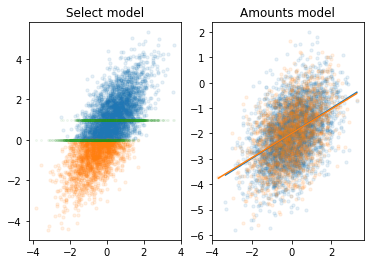

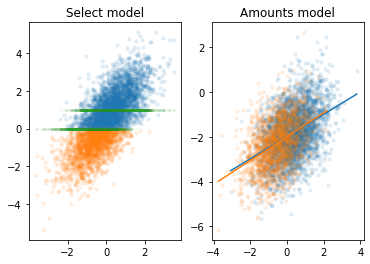

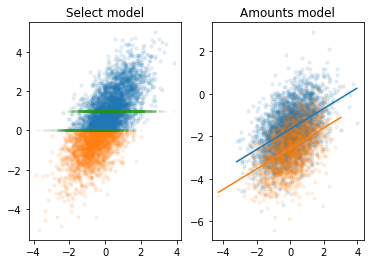

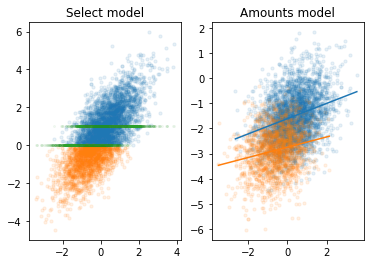

In [60]:
import matplotlib.pyplot as plt

def draw(data):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    flt = data.zstar > 0
    ax1.scatter(data[flt].w, data[flt].zstar, alpha=0.1, s=10)
    ax1.scatter(data[~flt].w, data[~flt].zstar, alpha=0.1, s=10)
    ax1.scatter(data.w, data.z, alpha=0.05, s=4)
    ax1.set_title('Select model')
    ax2.scatter(data[data.z==1].x, data[data.z==1].ystar, alpha=0.1, s=10)
    ax2.scatter(data[data.z==0].x, data[data.z==0].ystar, alpha=0.1, s=10)
    ax2.set_title('Amounts model')

    x = data[data.z==1].x
    y = data[data.z==1].ystar
    ax2.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    x = data[data.z==0].x
    y = data[data.z==0].ystar
    ax2.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.show()

draw(gen_data(0, 0))
draw(gen_data(0, 0.8))
draw(gen_data(0.8, 0))
draw(gen_data(0.8, 0.8))

## 使用Python做Heckman分析

这个heckman的代码是来自于python著名的统计库statsmodels，但是代码并没有合并到主分支里，所以只能从这个地方下载。

In [3]:
import heckman as heckman
res = heckman.Heckman(y, x_, w_).fit(method='twostep')
print(res.summary())

       Heckman Regression Results      
Dep. Variable:                        y
Model:                          Heckman
Method:                Heckman Two-Step
Date:                  Tue, 31 Oct 2023
Time:                          10:44:53
No. Total Obs.:                    5000
No. Censored Obs.:                 1829
No. Uncensored Obs.:               3171
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Constant      -2.0004      0.039    -51.658      0.000      -2.076      -1.925
Slope          0.5079      0.024     20.793      0.000       0.460       0.556
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Constant (Selection)     0.4716      0.021     21.966      0.000       0.430       0.514
Slope (Selection)        0.9510      0.027     35.323    

## Heckman两阶段回归的stata代码



In [ ]:
%%stata -d stata_data
heckman y x, select(z=w)